# 마르코프 체인 

$P$ 는 마르코프 체인의 전이 확률을 나타내며, 각 상태에서 다음 상태로의 전이 확률을 나타냅니다. 각 행은 현재 상태이고, 각 열은 다음 상태에 대한 확률을 나타낸다.
- 예를 들어, 첫 번째 행은 “맑음(sunny)” 상태에서 다음 상태로 맑음, 흐림, 비의 확률을 각각 0.7, 0.2, 0.1로 나타내고 있다.

이 행렬  $P$ 를 이용하여 마르코프 체인의 다음 상태를 예측하거나, 장기적으로 상태 분포를 계산하는 등의 분석을 할 수 있다.

In [116]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [117]:
P = np.array([[0.7, 0.2, 0.1],  #sunny -> [sunny, cloudy, rainy]
             [0.3, 0.65, 0.05], #cloduy -> [sunny, cloudy, rainy]
             [0.15, 0.35, 0.5]]) #rainy -> [sunny, cloudy, rainy]

In [118]:
using_P = np.array([[P[0][0], P[0][0]+P[0][1], P[0][0]+P[0][1]+P[0][2]],   #sunny -> [sunny, cloudy, rainy]
                    [P[1][0], P[1][0]+P[1][1], P[1][0]+P[1][1]+P[1][2]],   #cloduy -> [sunny, cloudy, rainy]
                    [P[2][0], P[2][0]+P[2][1], P[2][0]+P[2][1]+P[2][2]]])  #rainy -> [sunny, cloudy, rainy]

In [119]:
def MC_weather(N) :
    weather_list = ['sunny']
    for i in range(N) :
        current_weather = weather_list[-1]
        rd = random.uniform(0, 1)
        if current_weather == 'sunny' :
            if rd <= using_P[0][0] :
                next_weather = 'sunny'
                weather_list.append(next_weather)
            elif using_P[0][0] < rd <= using_P[0][1] :
                next_weather = 'cloudy'
                weather_list.append(next_weather)
            elif using_P[0][1] <= rd <= using_P[0][2] :
                next_weather = 'rainy'
                weather_list.append(next_weather)
        elif current_weather == 'cloudy' :
            if rd <= using_P[1][0] :
                next_weather = 'sunny'
                weather_list.append(next_weather)
            elif using_P[1][0] < rd <= using_P[1][1] :
                next_weather = 'cloudy'
                weather_list.append(next_weather)
            elif using_P[1][1] <= rd <= using_P[1][2] :
                next_weather = 'rainy'
                weather_list.append(next_weather)
        elif current_weather == 'rainy' :
            if rd <= using_P[2][0] :
                next_weather = 'sunny'
                weather_list.append(next_weather)
            elif using_P[2][0] < rd <= using_P[2][1] :
                next_weather = 'cloudy'
                weather_list.append(next_weather)
            elif using_P[2][1] <= rd <= using_P[2][2] :
                next_weather = 'rainy'
                weather_list.append(next_weather)
    return weather_list

Text(0.5, 1.0, 'histogram')

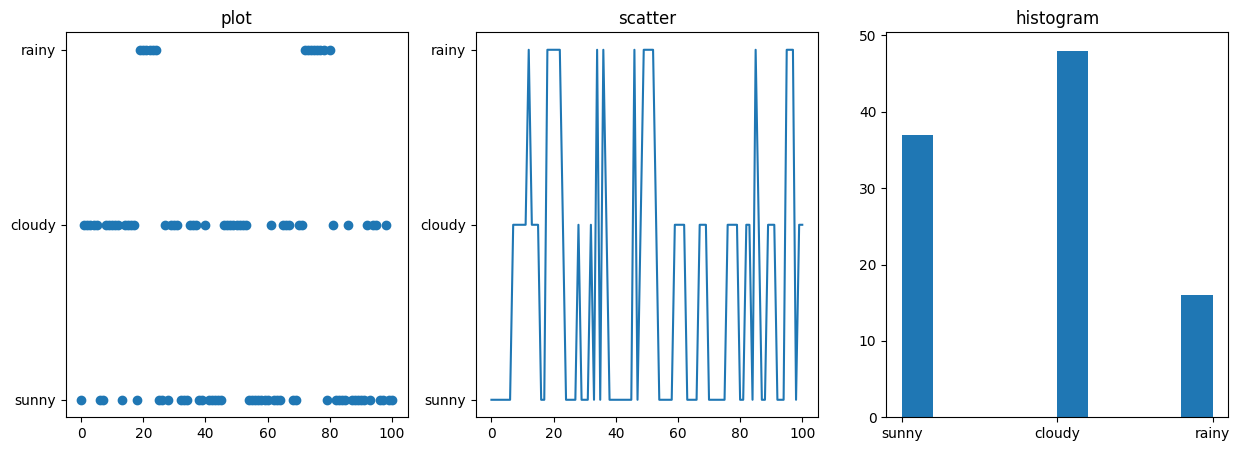

In [121]:
N = 100 #시뮬레이션 횟수
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.scatter(range(N + 1), MC_weather(N))
plt.title("plot")

plt.subplot(1,3,2)
plt.plot(MC_weather(N))
plt.title("scatter")

plt.subplot(1,3,3)
plt.hist(MC_weather(N))
plt.title("histogram")